In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, cross_val_score

In [2]:
filepath = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-Coursera/medical_insurance_dataset.csv'

In [6]:
df = pd.read_csv(filepath, header=None)

In [7]:
df.head()

,0,1,2,3,4,5,6
0,19,1,27.900,0,1,3,16884.92400
1,18,2,33.770,1,0,4,1725.55230
2,28,2,33.000,3,0,4,4449.46200
3,33,2,22.705,0,0,1,21984.47061
4,32,2,28.880,0,0,1,3866.85520


In [8]:
headers = ['Age', 'Gender', 'BMI', 'No_of_children', 'Smoker', 'Region', 'Charges']

In [9]:
df.columns = headers

In [10]:
df.replace('?', np.nan, inplace = True)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             2768 non-null   object 
 1   Gender          2772 non-null   int64  
 2   BMI             2772 non-null   float64
 3   No_of_children  2772 non-null   int64  
 4   Smoker          2765 non-null   object 
 5   Region          2772 non-null   int64  
 6   Charges         2772 non-null   float64
dtypes: float64(2), int64(3), object(2)
memory usage: 151.7+ KB


In [17]:
is_smoker = df['Smoker'].value_counts().idxmax()
df['Smoker'].replace(np.nan, is_smoker, inplace = True)

In [18]:
mean_age = df['Age'].astype('float').mean(axis=0)
df['Age'].replace(np.nan, mean_age, inplace = True)

In [19]:
df[['Age', 'Smoker']] = df[['Age', 'Smoker']].astype('int')

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             2772 non-null   int64  
 1   Gender          2772 non-null   int64  
 2   BMI             2772 non-null   float64
 3   No_of_children  2772 non-null   int64  
 4   Smoker          2772 non-null   int64  
 5   Region          2772 non-null   int64  
 6   Charges         2772 non-null   float64
dtypes: float64(2), int64(5)
memory usage: 151.7 KB


In [22]:
df[['Charges']] = np.round(df[['Charges']], 2)

(0.0, 66902.85800000001)

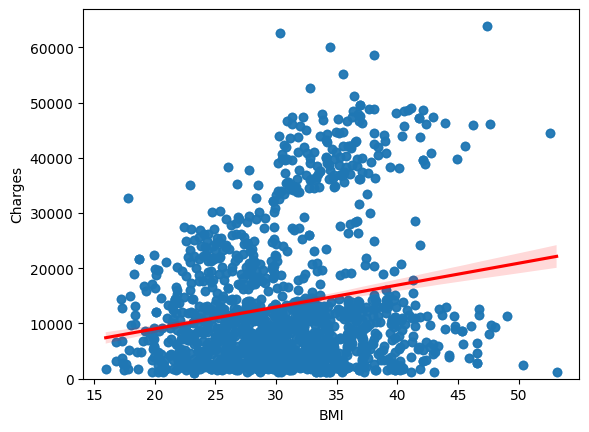

In [23]:
sns.regplot(x='BMI', y='Charges', data = df, line_kws={'color': 'red'})
plt.ylim(0,)

<Axes: xlabel='Smoker', ylabel='Charges'>

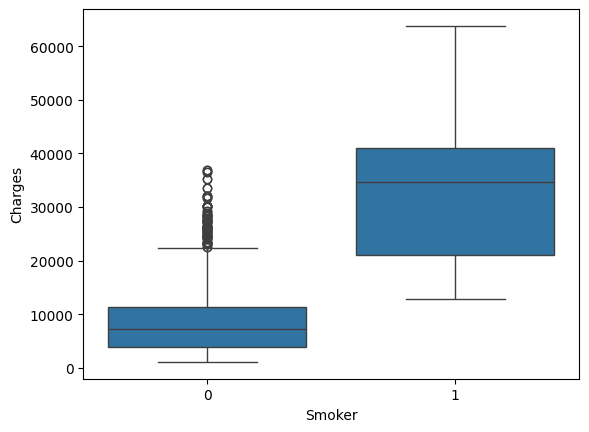

In [24]:
sns.boxplot(x='Smoker', y='Charges', data=df)

In [25]:
df.corr()

,Age,Gender,BMI,No_of_children,Smoker,Region,Charges
Age,1.000000,-0.026046,0.113048,0.037574,-0.023286,-0.007167,0.298624
Gender,-0.026046,1.000000,0.042924,0.016020,0.082326,0.022213,0.062837
BMI,0.113048,0.042924,1.000000,-0.001492,0.011489,0.271119,0.199846
No_of_children,0.037574,0.016020,-0.001492,1.000000,0.006362,-0.025717,0.066442
Smoker,-0.023286,0.082326,0.011489,0.006362,1.000000,0.054077,0.788783
Region,-0.007167,0.022213,0.271119,-0.025717,0.054077,1.000000,0.054058
Charges,0.298624,0.062837,0.199846,0.066442,0.788783,0.054058,1.000000


In [26]:
X = df[['Smoker']]
Y = df[['Charges']]
lm = LinearRegression()
lm.fit(X, Y)
print(lm.score(X, Y))

0.6221791733924185


In [27]:
Z = df[['Age', 'Gender', 'BMI', 'No_of_children', 'Smoker', 'Region']]
lm.fit(Z, Y)
print(lm.score(Z, Y))

0.7504083820289634


In [28]:
Input = [('scale', StandardScaler()), ('polynomial', PolynomialFeatures(include_bias = False)), ('model', LinearRegression())]

In [29]:
pipe = Pipeline(Input)

In [30]:
Z = Z.astype(float)

In [31]:
pipe.fit(Z, Y)

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [32]:
ypipe = pipe.predict(Z)

In [33]:
print(r2_score(Y, ypipe))

0.8452483847008637


In [34]:
x_train, x_test, y_train, y_test = train_test_split(Z, Y, test_size = 0.2, random_state = 1)

In [35]:
RidgeModel = Ridge(alpha=0.1)

In [36]:
RidgeModel.fit(x_train, y_train)

Ridge(alpha=0.1)

In [37]:
y_hat = RidgeModel.predict(x_test)

In [39]:
print(r2_score(y_test, y_hat))

0.6760807731582404


In [40]:
pr = PolynomialFeatures(degree=2)

In [41]:
x_train_pr = pr.fit_transform(x_train)
x_test_pr = pr.fit_transform(x_test)

In [42]:
RidgeModel.fit(x_train_pr, y_train)

Ridge(alpha=0.1)

In [43]:
yhat = RidgeModel.predict(x_test_pr)

In [44]:
print(r2_score(y_test, y_hat))

0.6760807731582404
